# Lichess Dataset Analysis

## Introduction

This notebook will be where I will do some data analysis on the Lichess dataset, which can be found here: https://www.kaggle.com/datasnaek/chess

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
data = pd.read_csv("games.csv")

In [4]:
plt.style.use('fivethirtyeight')
cust_color = ['black','dimgray','dimgrey','gray','grey','darkgray','darkgrey','silver','lightgray','lightgrey',
             'gainsboro','whitesmoke','white','snow','floralwhite','oldlace','wheat']
plt.rcParams['figure.figsize'] = (24,10)

In [5]:
# data.head()

We can add a column to our dataset which will hold the average rating on both players in the game

In [6]:
data['avg_rating'] = (data['black_rating'] + data['white_rating']) / 2

In [7]:
# data.head()

In [8]:
# maximum rating
max_rating = data['avg_rating'].max()
print(max_rating)

2475.5


In [9]:
# minimum rating
min_rating = data['avg_rating'].min()
print(min_rating)

816.5


In [10]:
# Put ratings into brackets with steps of 100
def ratings_brackets(x):
    n = 900
    while n < 2600:
        if x <= n:
            return f"{n-100} - {n}"
        n += 100
        
data['rating_bracket'] = data['avg_rating'].apply(ratings_brackets)

In [11]:
data["rating_bracket"].value_counts()

1500 - 1600    3073
1400 - 1500    3008
1600 - 1700    2525
1300 - 1400    2290
1700 - 1800    2141
1800 - 1900    1770
1200 - 1300    1392
1900 - 2000    1193
1100 - 1200     789
2000 - 2100     784
2100 - 2200     439
1000 - 1100     291
2200 - 2300     187
900 - 1000       83
2300 - 2400      72
2400 - 2500      11
800 - 900        10
Name: rating_bracket, dtype: int64

We will rework these numbers a bit before visualising

In [12]:
data["rating_bracket"].replace("800 - 900", "900 - 1000", inplace = True)
data["rating_bracket"].replace("900 - 1000", "- 1000", inplace = True)
data["rating_bracket"].replace("2400 - 2500", "2300 - 2400", inplace = True)
data["rating_bracket"].replace("2300 - 2400", "2300 +", inplace = True)

In [13]:
data["rating_bracket"].value_counts()

1500 - 1600    3073
1400 - 1500    3008
1600 - 1700    2525
1300 - 1400    2290
1700 - 1800    2141
1800 - 1900    1770
1200 - 1300    1392
1900 - 2000    1193
1100 - 1200     789
2000 - 2100     784
2100 - 2200     439
1000 - 1100     291
2200 - 2300     187
- 1000           93
2300 +           83
Name: rating_bracket, dtype: int64

<AxesSubplot:ylabel='rating_bracket'>

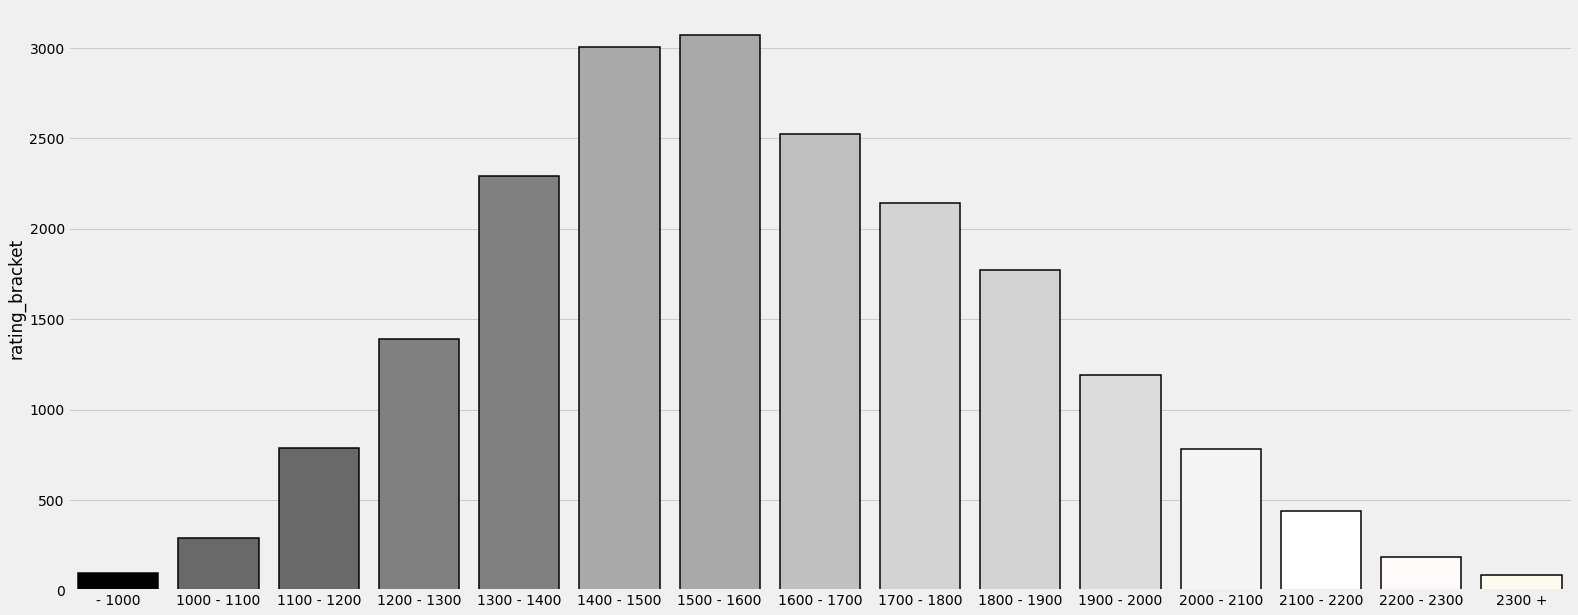

In [14]:
sns.barplot(x=data['rating_bracket'].value_counts().index, y=data['rating_bracket'].value_counts(),
           palette=cust_color, edgecolor='black',linewidth=1.5,saturation=1.5,
           order=sorted(set(data['rating_bracket'])))

Now we can take a look at the anerage number of moves a player makes within the ratings brackets

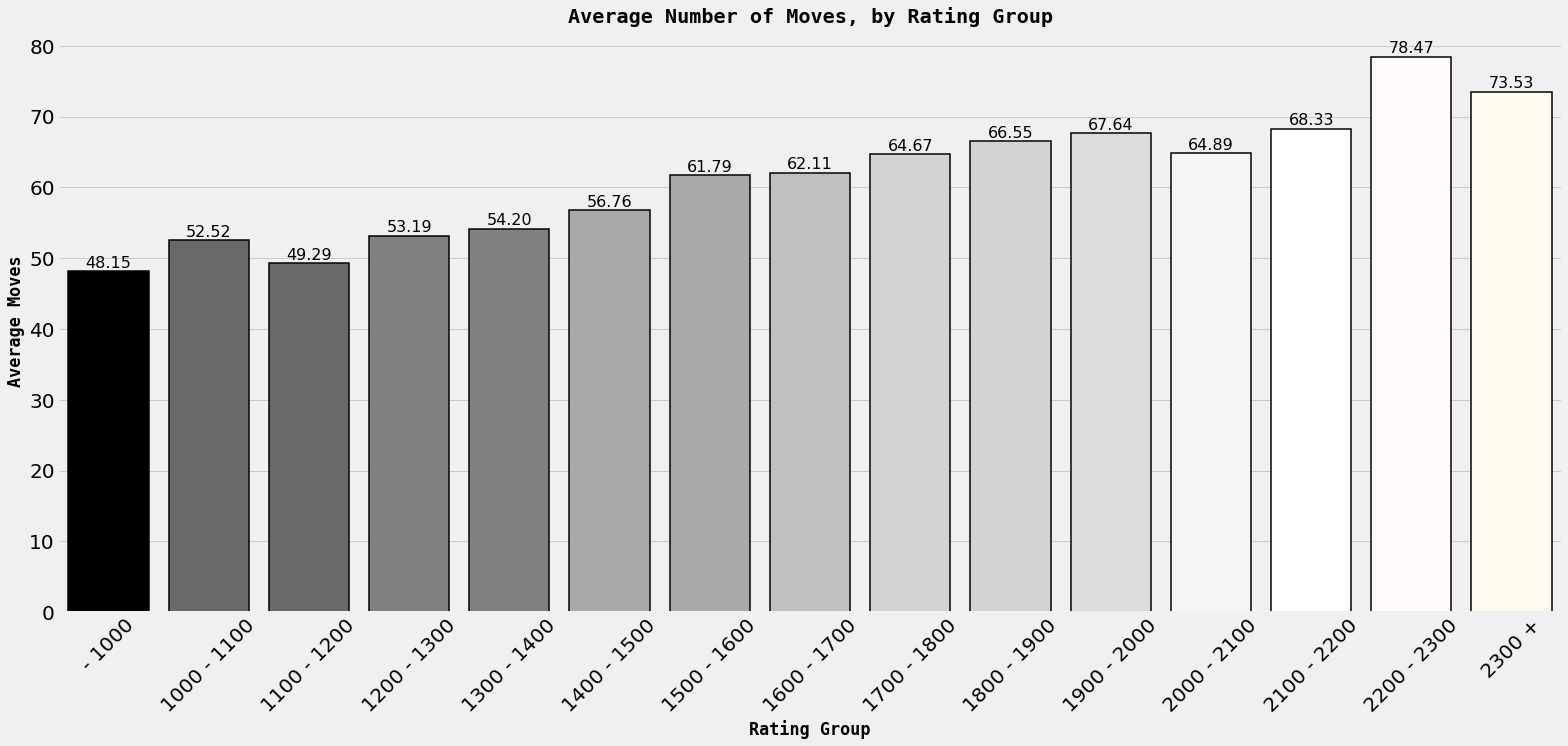

In [15]:
plots = sns.barplot(x=data.groupby('rating_bracket')['turns'].mean().index,
                    y=data.groupby('rating_bracket')['turns'].mean(),
                    palette=cust_color,edgecolor='black',linewidth=1.5,saturation=1.5)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=16, xytext=(0, 8),
                    textcoords='offset points')

plt.title('Average Number of Moves, by Rating Group', fontname = 'monospace', weight='bold')
plt.xlabel("Rating Group", fontname = 'monospace', weight='semibold')
plt.xticks(fontsize=20, rotation = 45)
plt.ylabel("Average Moves", fontname = 'monospace', weight='semibold')
plt.yticks(fontsize=20)
plt.show()

Now we can do an analysis on the game openings

In [16]:
# How many openings are listed in the data?
openings_num = len(data['opening_name'].value_counts())
print(openings_num)

1477


In [17]:
data.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,avg_rating,rating_bracket
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1345.5,1300 - 1400
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,1200 - 1300
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0,1400 - 1500


In [18]:
# How many games?
data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,avg_rating
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981,1592.731927
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152,263.173825
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,816.500000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000,1406.500000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000,1568.750000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000,1771.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000,2475.500000


We can see from `count` that there are 20058, which generated 1477 opening moves.

We will need to clean up some of the opening names, accounting for slight variations.

In [19]:
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(":")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" #")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" |")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" #")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" Accepted")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" Declined")[0])
data["opening_name"] = data["opening_name"].apply(lambda x: x.split(" Refused")[0])

data["opening_name"].replace("King's Pawn Game", "King's Pawn", inplace = True)
data["opening_name"].replace("King's Pawn Opening", "King's Pawn", inplace = True)
data["opening_name"].replace("Old Indian Defense", "Old Indian", inplace = True)
data["opening_name"].replace("Queen's Pawn Game", "Queen's Pawn", inplace = True)
data["opening_name"].replace("Queen's Pawn Opening", "Queen's Pawn", inplace = True)
data["opening_name"].replace("Ware Defense", "Ware Opening", inplace = True)

In [20]:
print(len(data["opening_name"].value_counts()))

122


We will focus our analysis on moves that were played more than 100 times

In [21]:
opening_move_100 = data.groupby('opening_name').filter(lambda x : len(x) > 100)
opening_move_100['opening_name'].value_counts()

Sicilian Defense         2632
French Defense           1412
Queen's Pawn             1376
Italian Game              981
King's Pawn               948
Queen's Gambit            912
Ruy Lopez                 858
English Opening           720
Scandinavian Defense      716
Philidor Defense          691
Caro-Kann Defense         597
Scotch Game               465
Four Knights Game         370
Van't Kruijs Opening      368
Zukertort Opening         336
Bishop's Opening          323
Indian Game               319
Pirc Defense              288
Russian Game              252
Slav Defense              240
King's Gambit             237
Modern Defense            225
Nimzowitsch Defense       224
Horwitz Defense           209
King's Indian Defense     197
Alekhine Defense          192
King's Knight Opening     183
Hungarian Opening         179
Center Game               172
Owen Defense              171
Nimzo-Larsen Attack       164
Bird Opening              157
Nimzo-Indian Defense      157
Vienna Gam

In [22]:
opening_move_100['opening_name'].value_counts().sum()

17969

There are 39 opening moves, which are used more than 100 times. This accounts for (17969/20058) * 100 = 89.6% of all opening moves in the dataset

Now we can take a look at each opening's frequency within every rating bracket.

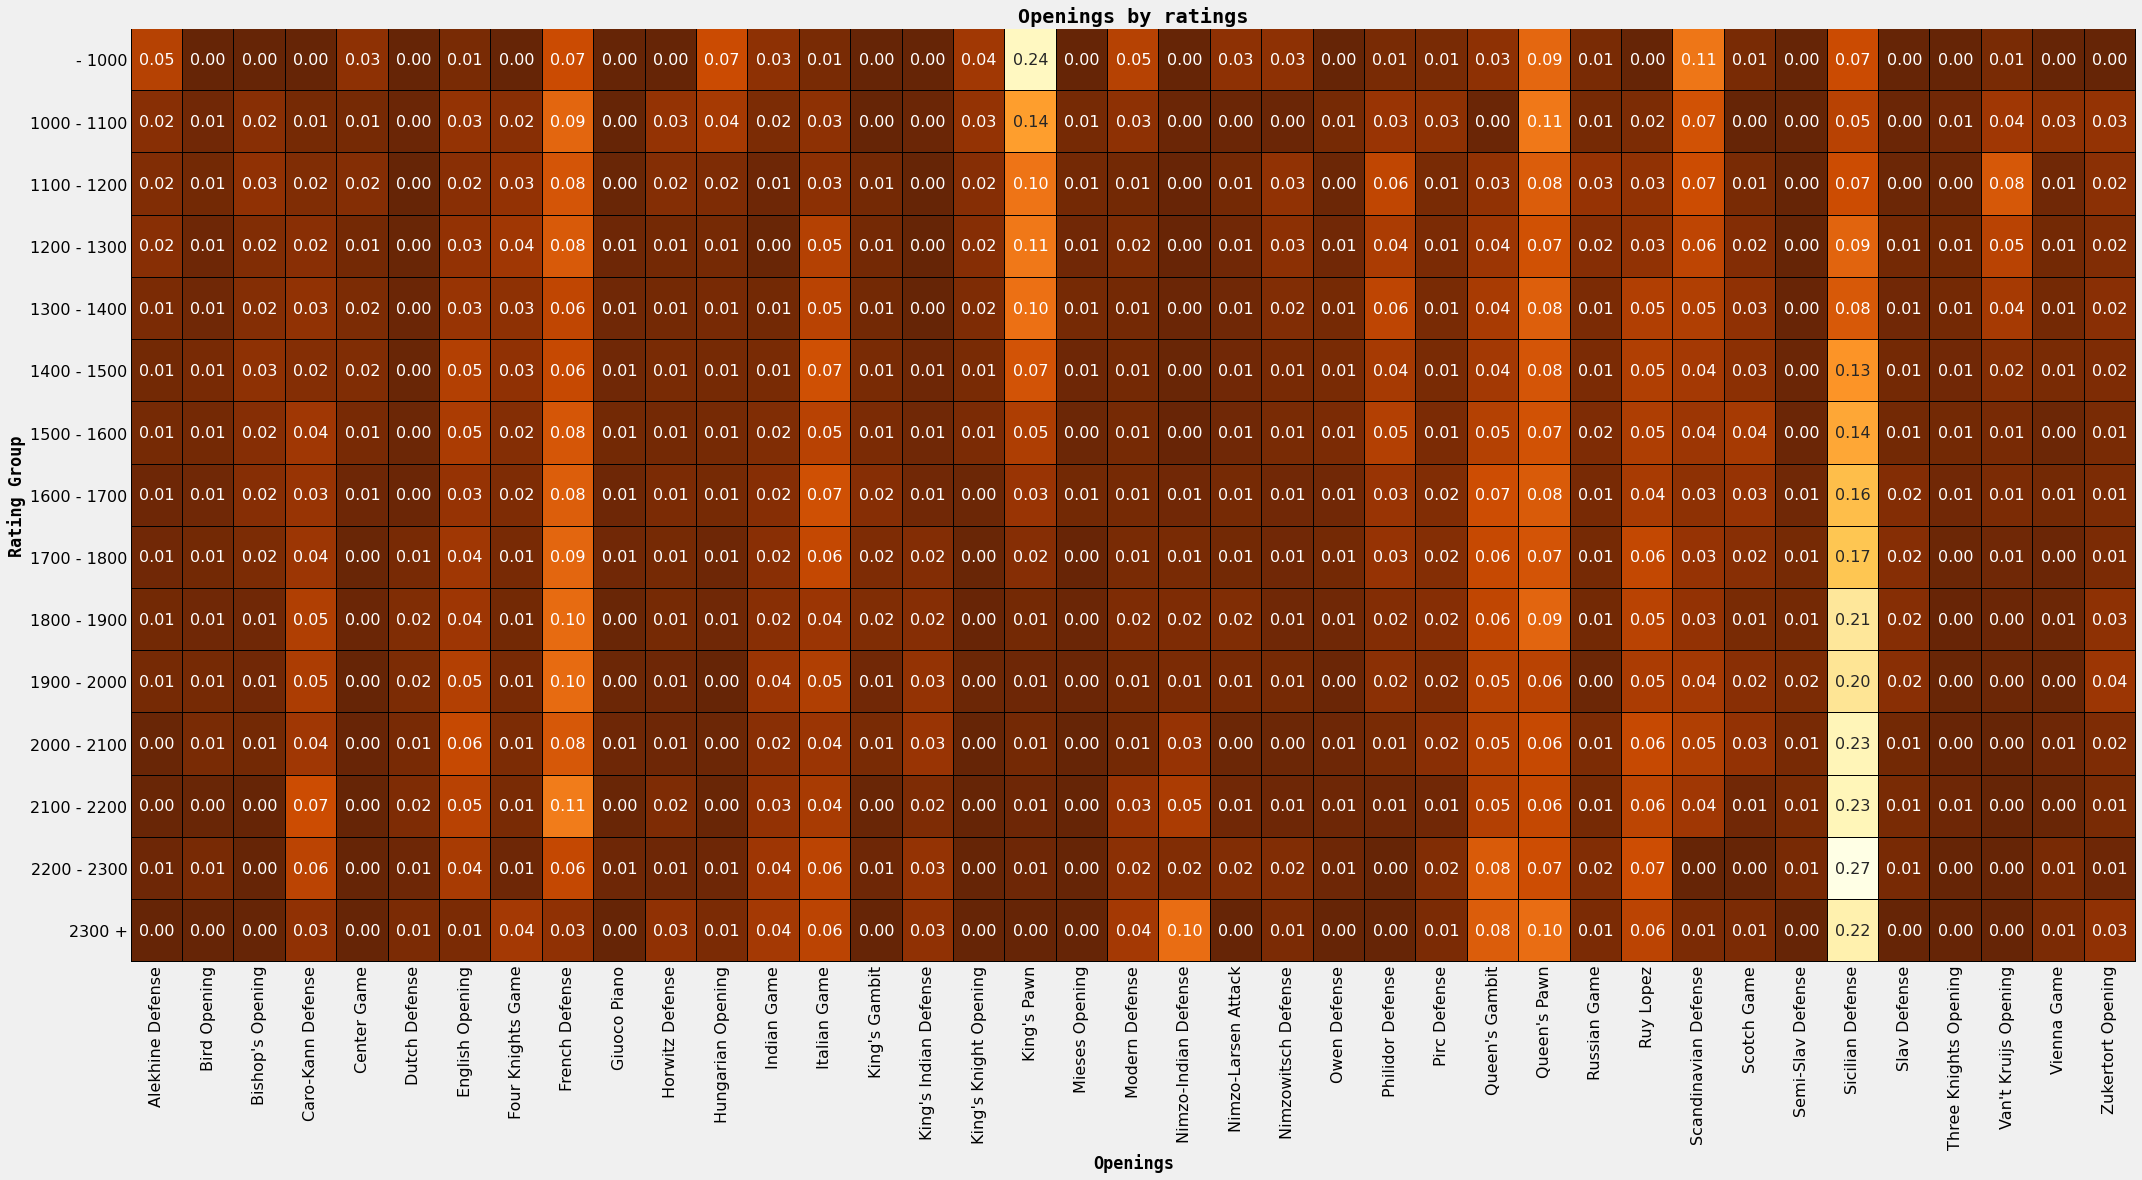

In [23]:
z = opening_move_100.groupby(['rating_bracket','opening_name']).size().unstack().fillna(0).astype(int)
fig,ax = plt.subplots(figsize=(32,16))

sns.heatmap(z.apply(lambda x : x/x.sum(),axis=1),
           xticklabels=True,
           yticklabels=True,
           cmap='YlOrBr_r',
           annot=True,
           linewidths=0.005,
           linecolor='black',
           annot_kws={"fontsize" : 16},
           fmt='.2f',
           cbar=False)

plt.title('Openings by ratings', fontname = 'monospace', weight='bold')
plt.xticks(fontsize = 16)
plt.xlabel("Openings", fontname = 'monospace', weight='semibold')
plt.yticks(fontsize=16, rotation = 0)
plt.ylabel("Rating Group", fontname = 'monospace', weight='semibold')
plt.show()
del z

The headmap above shows every opening's frequency of use per rating group. The lighter the square, the more often that opening is played in that group.

There are 2 or 3 openings that stand out. Each of them has a tendency:
- King's pawn: decreasing gradually as the ratings group goes up. Meaning that as a player gets better (i.e. increases in rating) the chances of them encountering this opening goes down.
- Scandinavian defense: same as King's pawn, just not as sharp a decline
- Sicilian defense: the oposite of the two previously mentioned. As a player's rating increases, the chances of them encountering this opening increases as well.

## Outcomes by Rating

Typically, a person playing "white" is considered to have the advantage of the first move. Will the analysis bear this out?

In [24]:
outcomes = data.groupby(['rating_bracket',"winner"]).size().unstack().astype(int)
outcomes = outcomes.div(outcomes.sum(axis=1),axis=0).mul(100).round(2)

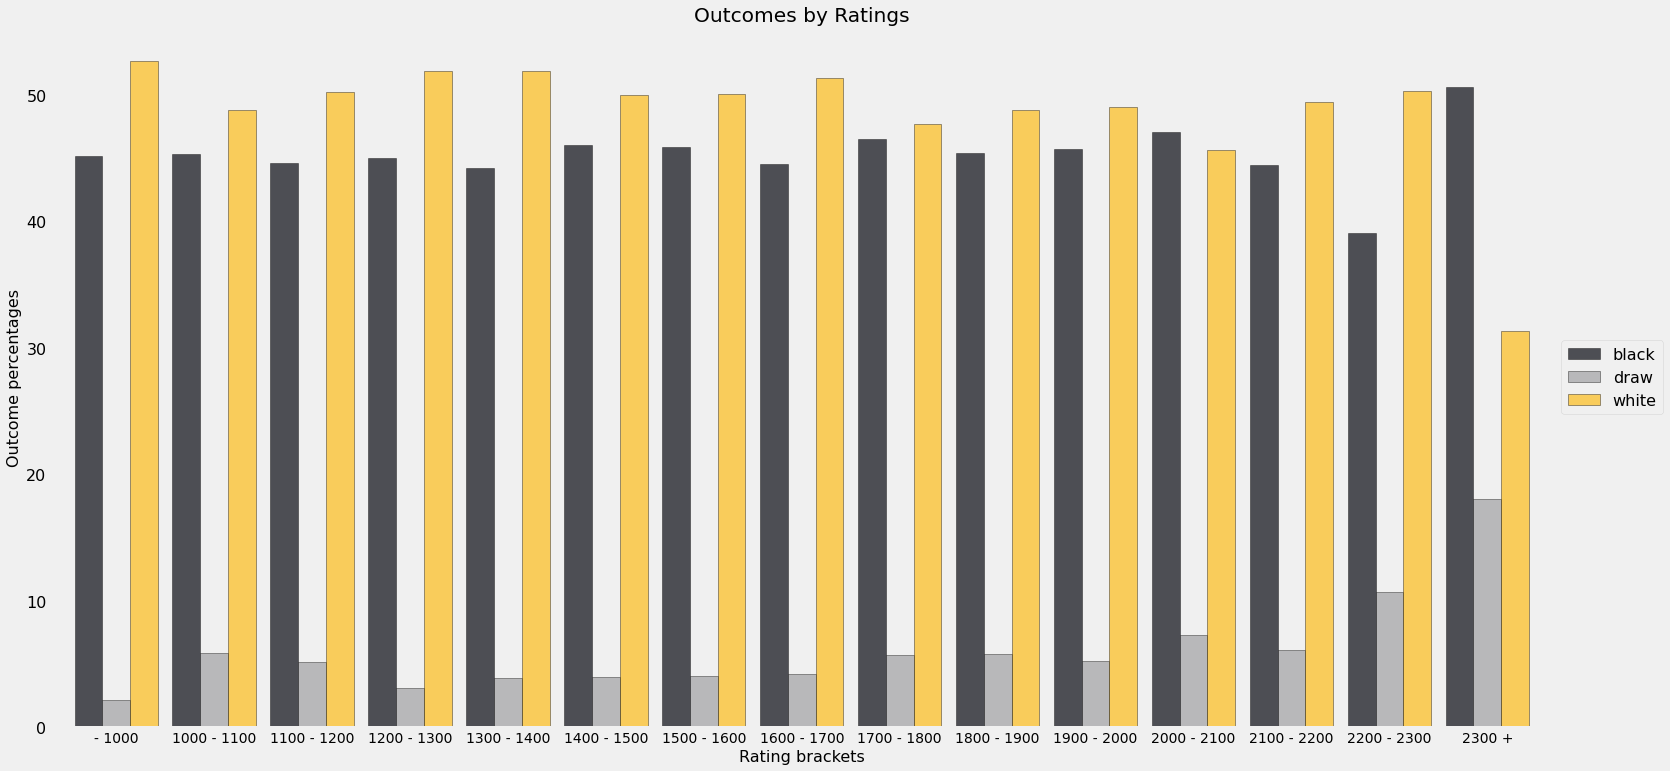

In [25]:
plots = outcomes.plot(kind="bar", alpha=0.75,
                     color=['#171820','#a6a6a8','#fdc029'],
                     figsize=(24,12),
                     width=0.85,
                     title="Outcomes by Ratings",
                     edgecolor='black')

plots.grid(alpha = 0.25)    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 16})
plt.xlabel("Rating brackets", fontsize = 16)
plt.xticks(fontsize = 14, rotation = 0)
plt.ylabel("Outcome percentages", fontsize = 16)
plt.yticks(fontsize=16)
plt.show()

The trend is very much that white will win the game, this is the trend right up to the 2300 and above rating bracket, where there is very pronounced change with black becoming the clear favorite. This sudden change seems unusual, and could stem from something usual in the data.

We can also see that as we move up through the ratings, there the chances of a draw are increase

## Opening victories

Let us see how many moves each game with a specific opening move has.

In [26]:
opening_move_100.groupby('opening_name')['turns'].mean().nlargest(39)

opening_name
King's Indian Defense    70.756345
Semi-Slav Defense        69.518519
Nimzo-Indian Defense     66.662420
Indian Game              65.673981
Modern Defense           65.320000
Caro-Kann Defense        64.613065
Slav Defense             64.183333
Queen's Pawn             63.502180
Ruy Lopez                63.393939
Hungarian Opening        63.212291
Nimzo-Larsen Attack      63.176829
Philidor Defense         63.037627
English Opening          62.840278
Sicilian Defense         62.786094
Queen's Gambit           62.348684
Vienna Game              61.868613
Four Knights Game        61.545946
French Defense           61.223796
Dutch Defense            60.720000
Pirc Defense             59.791667
Three Knights Opening    59.538462
Horwitz Defense          58.722488
Zukertort Opening        58.446429
Alekhine Defense         58.359375
Giuoco Piano             58.194444
Owen Defense             57.754386
Italian Game             57.477064
Nimzowitsch Defense      56.995536
King's 

In [27]:
opening_move_100.groupby('opening_name')['turns'].mean().nlargest(39).index

Index(['King's Indian Defense', 'Semi-Slav Defense', 'Nimzo-Indian Defense',
       'Indian Game', 'Modern Defense', 'Caro-Kann Defense', 'Slav Defense',
       'Queen's Pawn', 'Ruy Lopez', 'Hungarian Opening', 'Nimzo-Larsen Attack',
       'Philidor Defense', 'English Opening', 'Sicilian Defense',
       'Queen's Gambit', 'Vienna Game', 'Four Knights Game', 'French Defense',
       'Dutch Defense', 'Pirc Defense', 'Three Knights Opening',
       'Horwitz Defense', 'Zukertort Opening', 'Alekhine Defense',
       'Giuoco Piano', 'Owen Defense', 'Italian Game', 'Nimzowitsch Defense',
       'King's Gambit', 'Scandinavian Defense', 'Scotch Game',
       'Bishop's Opening', 'Van't Kruijs Opening', 'Russian Game',
       'Bird Opening', 'Center Game', 'King's Pawn', 'King's Knight Opening',
       'Mieses Opening'],
      dtype='object', name='opening_name')

In [28]:
opening_name_winner = opening_move_100.groupby(['winner','opening_name']).size().unstack().fillna(0).astype(int)

In [29]:
opening_name_winner = opening_name_winner.div(opening_name_winner.sum(axis=0),axis=1).mul(100) \
.round(2).transpose()

In [30]:
opening_name_winner = \
opening_name_winner.reindex(["King's Indian Defense", "Semi-Slav Defense", "Nimzo-Indian Defense",
       "Indian Game", "Modern Defense", 'Caro-Kann Defense', 'Slav Defense',
       "Queen's Pawn", 'Ruy Lopez', 'Hungarian Opening', 'Nimzo-Larsen Attack',
       'Philidor Defense', 'English Opening', 'Sicilian Defense',
       "Queen's Gambit", 'Vienna Game', 'Four Knights Game', 'French Defense',
       'Dutch Defense', 'Pirc Defense', 'Three Knights Opening',
       'Horwitz Defense', 'Zukertort Opening', 'Alekhine Defense',
       'Giuoco Piano', 'Owen Defense', 'Italian Game', 'Nimzowitsch Defense',
       "King's Gambit", 'Scandinavian Defense', 'Scotch Game',
       "Bishop's Opening", "Van't Kruijs Opening", 'Russian Game',
       'Bird Opening', 'Center Game', "King's Pawn", "King's Knight Opening",
       'Mieses Opening'])

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

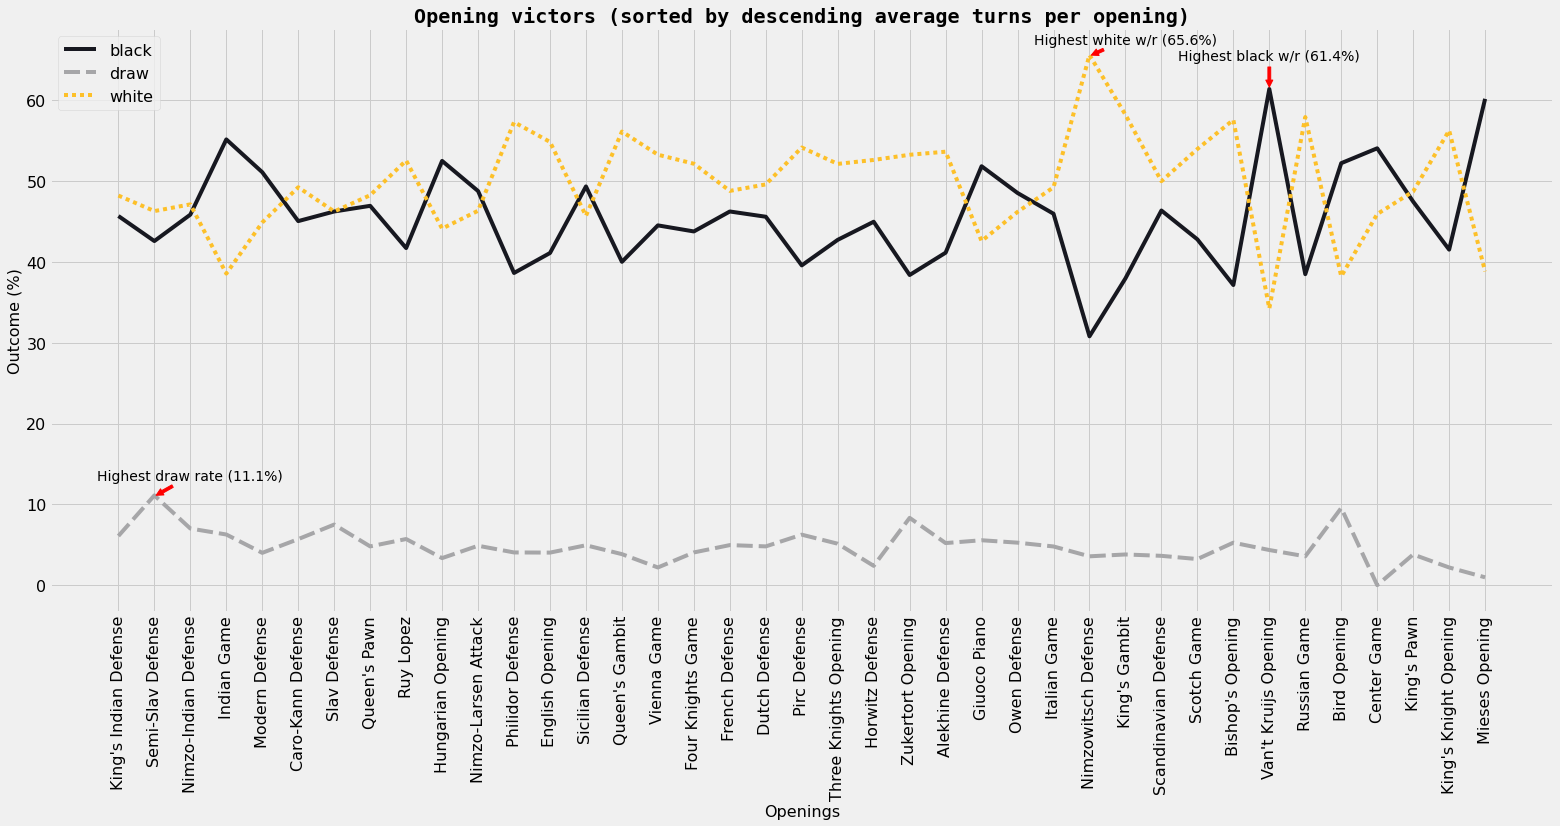

In [31]:
fig, ax = plt.subplots(figsize=(24, 10))
# sns.lineplot(data = opening_name_winner, palette=['#171820','#a6a6a8','#fdc029'], dashes=[(1, 0), (1, 0), (1, 0)],
#             sort = False)
sns.lineplot(data = opening_name_winner, palette=['#171820','#a6a6a8','#fdc029'], sort = False)

plt.annotate("Highest draw rate (11.1%)", xy=(1,11), xytext=(2,13), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple',lw=1, color='red'))

plt.annotate("Highest white w/r (65.6%)", xy=(27,65.5), xytext=(28,67), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple',lw=1, color='red'))

plt.annotate("Highest black w/r (61.4%)", xy=(32,61.4), xytext=(32,65), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple',lw=1, color='red'))

plt.title('Opening victors (sorted by descending average turns per opening)', 
          fontname = 'monospace', weight='bold')
plt.legend(prop={'size': 16})
plt.xlabel("Openings", fontsize = 16)
plt.xticks(fontsize = 16, rotation = 90)
plt.ylabel("Outcome (%)", fontsize = 16)
plt.yticks(fontsize=16)

- The opening moves are listed in the opening with the highest moves to the left, and lowest number of moves to the right.
- There does not seem to be any correlation between a games outcome and the duration in moves.
- 11/39 openings show an advantage to the black player. Two of them are above 60% - Kan't Kruijs Opening and Mieses Opening
- The Semi-Slav Defense has the highest probability of ending in a draw - 11.1%.
- The overall highest win-rate is Nimzowitsch Defense's, for the white player.

## Opening Outcomes

An obvious thing to look at as the outcomes of the different opening moves

In [32]:
opening_move_100["victory_status"].value_counts()

resign       10007
mate          5654
outoftime     1504
draw           804
Name: victory_status, dtype: int64

We can see that roughly around half of the games end in resignation, which us understandable: when a player sees they have no hope of winning, they may well resign.    

Let's add this information into the same type of plot above.

In [33]:
opening_outcomes = opening_move_100.groupby(["victory_status","opening_name"]).size().unstack().fillna(0).astype(int)
opening_outcomes = opening_outcomes.div(opening_outcomes.sum(axis=0),axis=1).mul(100).round(2).transpose()
opening_outcomes = opening_outcomes.reindex(["King's Indian Defense", "Semi-Slav Defense", "Nimzo-Indian Defense",
       "Indian Game", "Modern Defense", 'Caro-Kann Defense', 'Slav Defense',
       "Queen's Pawn", 'Ruy Lopez', 'Hungarian Opening', 'Nimzo-Larsen Attack',
       'Philidor Defense', 'English Opening', 'Sicilian Defense',
       "Queen's Gambit", 'Vienna Game', 'Four Knights Game', 'French Defense',
       'Dutch Defense', 'Pirc Defense', 'Three Knights Opening',
       'Horwitz Defense', 'Zukertort Opening', 'Alekhine Defense',
       'Giuoco Piano', 'Owen Defense', 'Italian Game', 'Nimzowitsch Defense',
       "King's Gambit", 'Scandinavian Defense', 'Scotch Game',
       "Bishop's Opening", "Van't Kruijs Opening", 'Russian Game',
       'Bird Opening', 'Center Game', "King's Pawn", "King's Knight Opening",
       'Mieses Opening'])

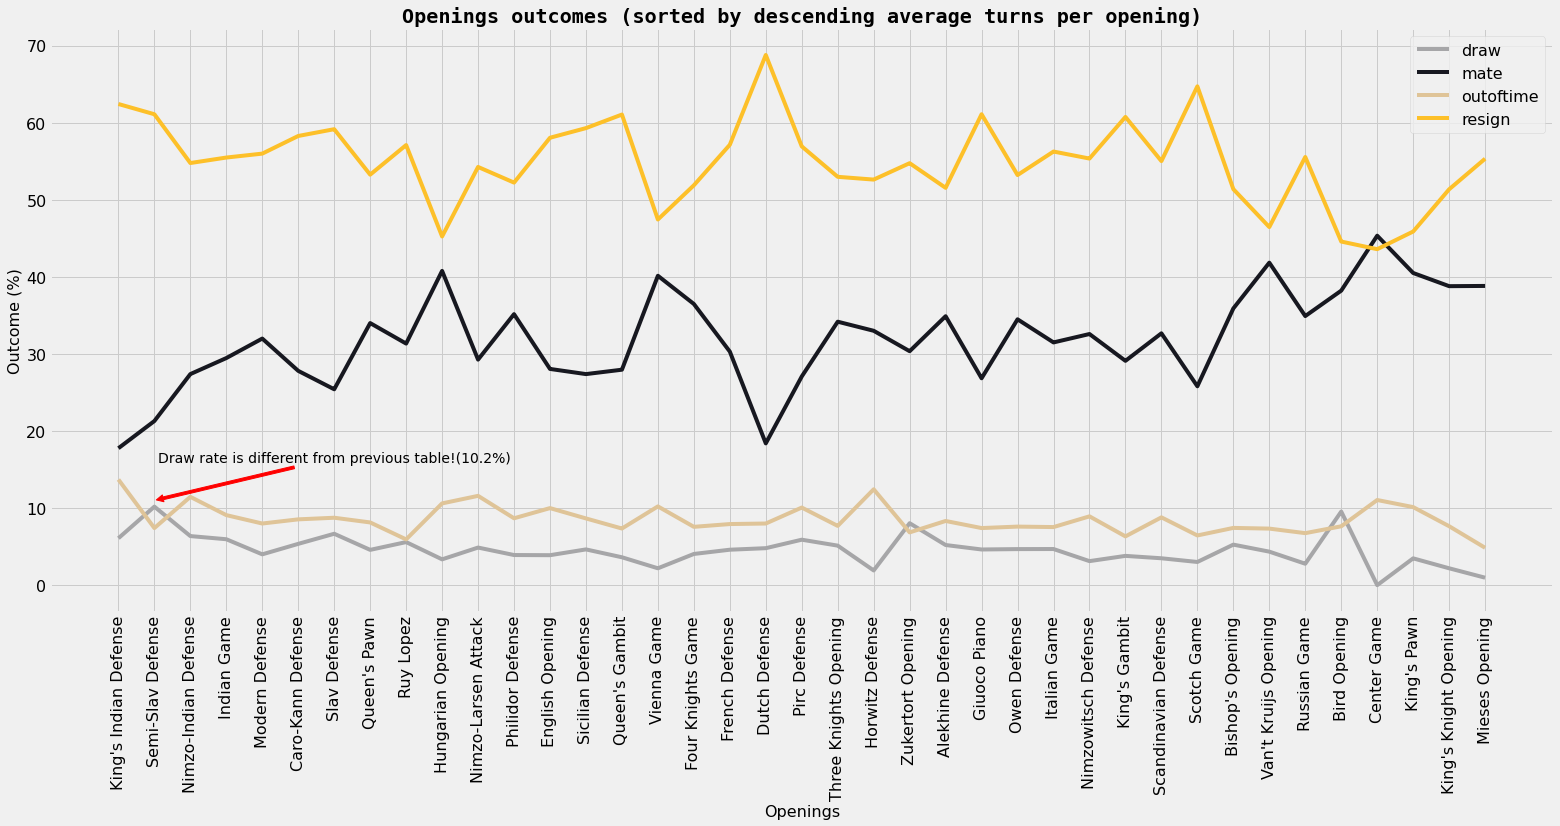

In [35]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.lineplot(data = opening_outcomes, palette=['#a6a6a8', "#171820", '#dfc498','#fdc029'], dashes=[(1, 0), (1, 0), (1, 0), (1, 0)],
            sort = False)

plt.annotate("Draw rate is different from previous table!(10.2%)", xy=(1,11), xytext=(6,16), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple',lw=1, color='red') )

plt.title('Openings outcomes (sorted by descending average turns per opening)', 
          fontname = 'monospace', weight='bold')
plt.legend(prop={'size': 16})
plt.xlabel("Openings", fontsize = 16)
plt.xticks(fontsize = 16, rotation = 90)
plt.ylabel("Outcome (%)", fontsize = 16)
plt.yticks(fontsize=16)

plt.show()

We can see that `resign` are the most common outcome, the cames `mate` followed by games which were `outoftime` and the `draws` at the end.    

We can also see that:
- the `draw` line is similar, however there is a bit of a change, with the `Semi-Slav Defense` having about a 1% lower occirance then before. How is this?

In [36]:
len(opening_move_100[(opening_move_100["winner"]=="draw") &  (opening_move_100["victory_status"] != "draw")])

42

There were 42 occurances when a draw occured in a game where the player ran out of time